In [4]:
####Analysis of Indian election data for 2009 and 2014

##Loading libraries

import sys
print("Python version:{}".format(sys.version))

import os

import numpy
print("Numpy version:{}".format(numpy.__version__))

import scipy
print("Scipy version:{}".format(scipy.__version__))

import matplotlib
print("Matplotlib version:{}".format(matplotlib.__version__))

import pandas 
print("Pandas version:{}".format(pandas.__version__))

import sklearn
print("Pandas version :{}".format(sklearn.__version__))

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

##Loading Datasets
print(os.getcwd())
os.chdir("D:\Data Science\Indian Election Data")
print(os.getcwd())

candidate_2014_db = pandas.read_csv("LS2014Candidate.csv")

print(candidate_2014_db.head(10))

###Data analysis and evaluation
candidate_2014_db.describe()
candidate_2014_db.isnull().sum()
candidate_2014_db = candidate_2014_db.dropna()
print(candidate_2014_db.isnull().sum())
candidate_2014_db.shape
candidate_2014_db.info()

###Increase plot size

#Get current size
fig_size = plt.rcParams["figure.figsize"]

#Print current size
print("Current size", fig_size)

#Set figure width to 12 and size to 4
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

#Print new size
print("New size: ", fig_size)



Python version:3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Numpy version:1.15.4
Scipy version:1.1.0
Matplotlib version:3.0.2
Pandas version:0.23.4
Pandas version :0.20.1
D:\Data Science\Indian Election Data
D:\Data Science\Indian Election Data
  ST_CODE      State name  Month  Year  PC Number      PC name PC Type  \
0     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
1     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
2     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
3     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
4     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
5     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
6     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
7     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
8     S01  Andhra Pradesh      5  2014          1    Adilabad      

In [5]:
first_position_2014 = candidate_2014_db[candidate_2014_db.Position ==1]
party_list = first_position_2014['Party Abbreviation'].value_counts().head(6).to_dict()
sum_seats = sum(first_position_2014['Party Abbreviation'].value_counts().tolist())
print(sum_seats)
party_list['Other Parties'] = sum_seats - sum(first_position_2014['Party Abbreviation'].value_counts().head(6).tolist())
print(party_list)


543
{'BJP': 282, 'INC': 44, 'ADMK': 37, 'AITC': 34, 'BJD': 20, 'SHS': 18, 'Other Parties': 108}


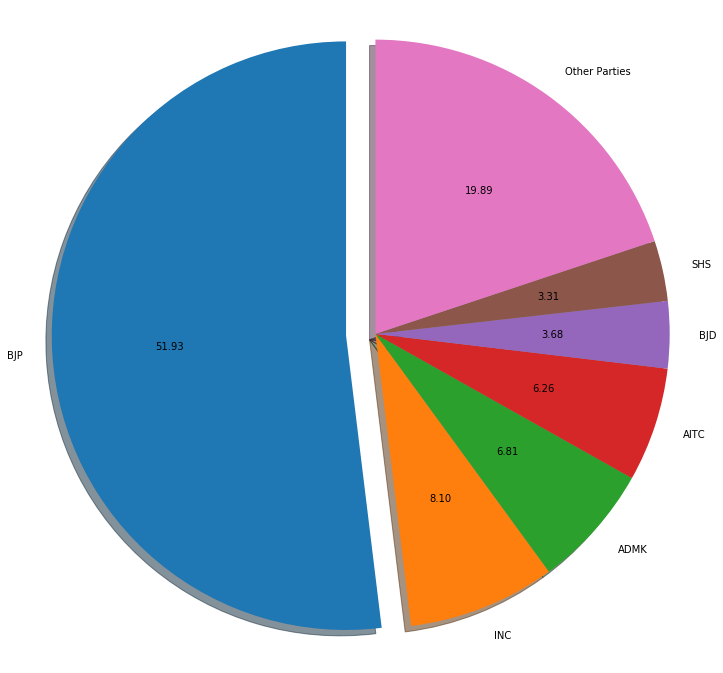

In [6]:

explode_tuple = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
figreObject, axesObject = plt.subplots()
axesObject.pie(party_list.values(), labels = party_list.keys(),
              autopct = '%1.2f',
              shadow = True,
              explode = explode_tuple,
              startangle = 90)

axesObject.axis('equal')
plt.show()

In [8]:
votes_polled = first_position_2014.groupby('Party Abbreviation')['Total Votes Polled'].sum().to_dict()
import collections
import operator
sorted_votes_polled = sorted(votes_polled.items(), key = operator.itemgetter(1))
sorted_votes_polled = collections.OrderedDict(sorted_votes_polled)
pandas.DataFrame.from_dict(sorted_votes_polled,orient='index', columns = ['Total Votes Polled'])

,Total Votes Polled
SDF,163698
NPEP,239301
AINRC,255826
CPI,389209
RSP,408528
KEC(M),424194
PMK,468194
AIMIM,513868
JKPDP,533629
SWP,640428


In [9]:
###Increase plot size

#Get current size
fig_size = plt.rcParams["figure.figsize"]

#Print current size
print("Current size", fig_size)

#Set figure width to 12 and size to 4
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

#Print new size
print("New size: ", fig_size)

Current size [12.0, 12.0]
New size:  [20, 20]


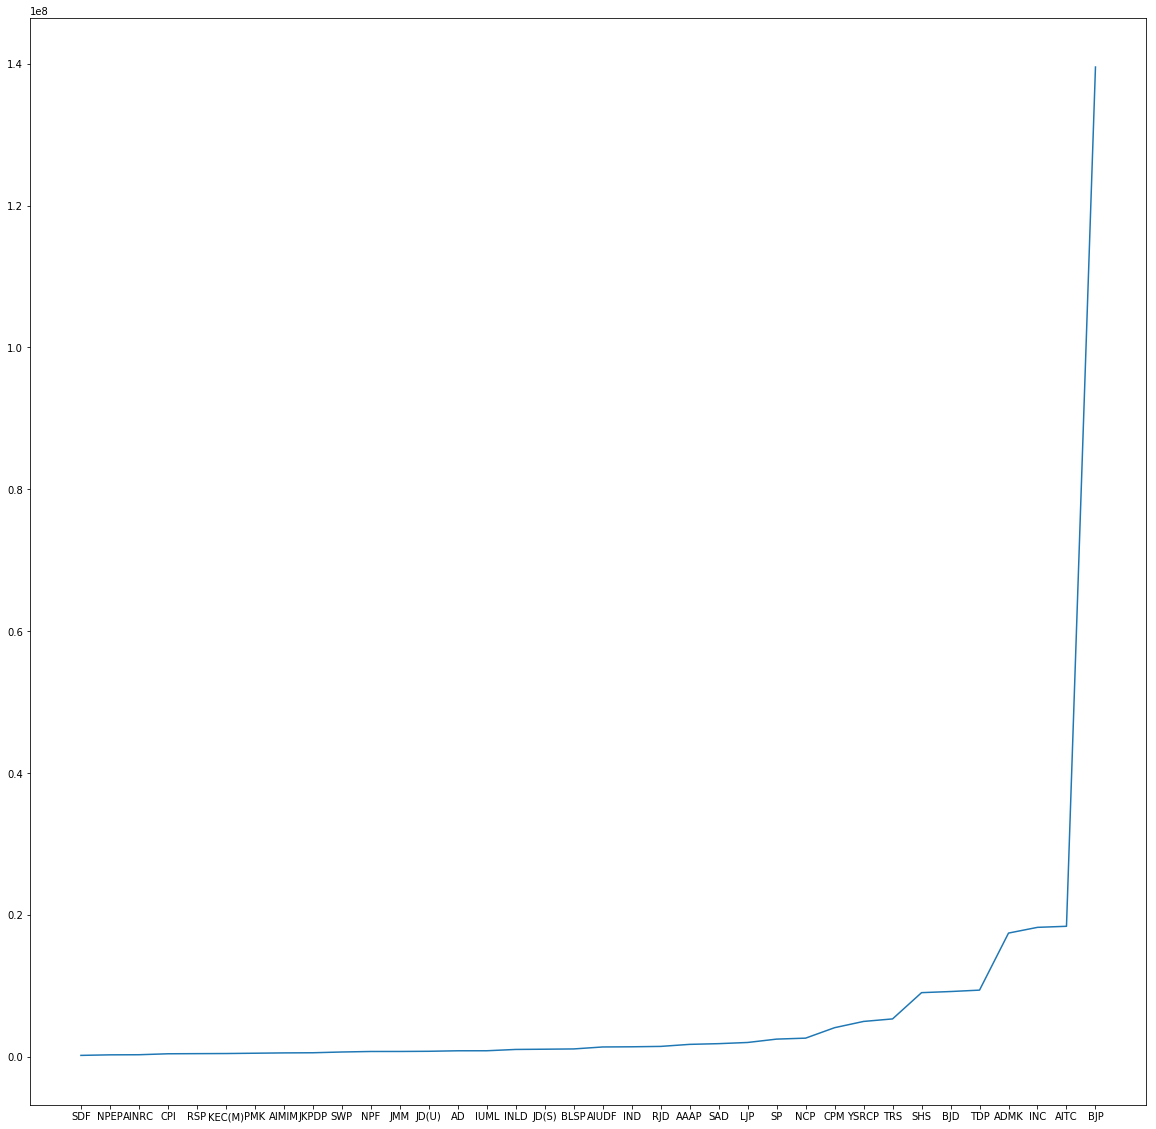

In [56]:
import matplotlib.pylab as pyl
pyl.plot(*zip(*sorted(sorted_votes_polled.items(), key=lambda x:x[1])))

In [11]:
candidate_2014_db['State name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [12]:
print(candidate_2014_db['PC name'].nunique())
type(candidate_2014_db)

540


pandas.core.frame.DataFrame

In [13]:
first_position_2014 = candidate_2014_db[candidate_2014_db.Position ==1]
second_position_2014 = candidate_2014_db[candidate_2014_db.Position == 2]
vote_difference = first_position_2014[['State name','PC name','Party Abbreviation',]].copy()
vote_difference['Difference'] = first_position_2014['Total Votes Polled'].subtract(second_position_2014['Total Votes Polled'], fill_value = 0)

In [27]:
vote_difference.info()
vote_difference.describe()
vote_difference.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 8763
Data columns (total 4 columns):
State name            543 non-null object
PC name               543 non-null object
Party Abbreviation    543 non-null object
Difference            543 non-null float64
dtypes: float64(1), object(3)
memory usage: 21.2+ KB


,State name,PC name,Party Abbreviation,Difference
0,Andhra Pradesh,Adilabad,TRS,430847.0
9,Andhra Pradesh,Peddapalle,TRS,565496.0
27,Andhra Pradesh,Karimnagar,TRS,505358.0
45,Andhra Pradesh,Nizamabad,TRS,439307.0
62,Andhra Pradesh,Zahirabad,TRS,508661.0
73,Andhra Pradesh,Medak,TRS,657492.0
87,Andhra Pradesh,Malkajgiri,TDP,523356.0
118,Andhra Pradesh,Secundrabad,BJP,438271.0
149,Andhra Pradesh,Hyderabad,AIMIM,513868.0
166,Andhra Pradesh,CHELVELLA,TRS,435077.0


In [29]:
vote_difference_party = vote_difference.groupby('Party Abbreviation')['Difference'].sum()

In [45]:
vote_difference_party = vote_difference_party.sort_values(ascending = False)

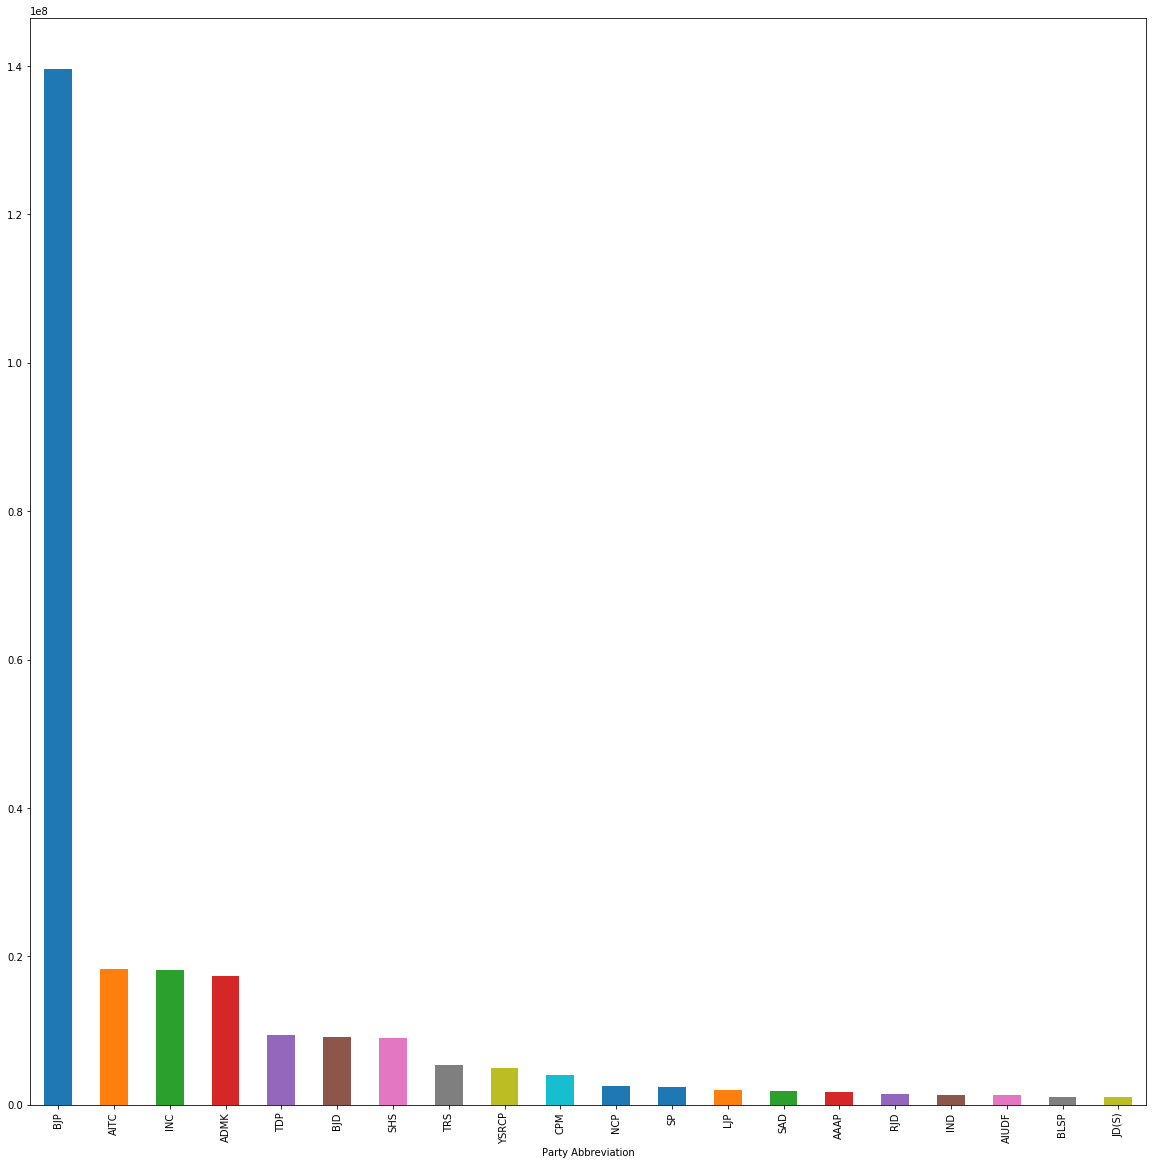

In [49]:
import matplotlib.pyplot as plt
vote_difference_party.head(20).plot.bar()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 8763
Data columns (total 14 columns):
ST_CODE               543 non-null object
State name            543 non-null object
Month                 543 non-null int64
Year                  543 non-null int64
PC Number             543 non-null int64
PC name               543 non-null object
PC Type               543 non-null object
Candidate Name        543 non-null object
Candidate Sex         543 non-null object
Candidate Category    543 non-null object
Candidate Age         543 non-null float64
Party Abbreviation    543 non-null object
Total Votes Polled    543 non-null int64
Position              543 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>


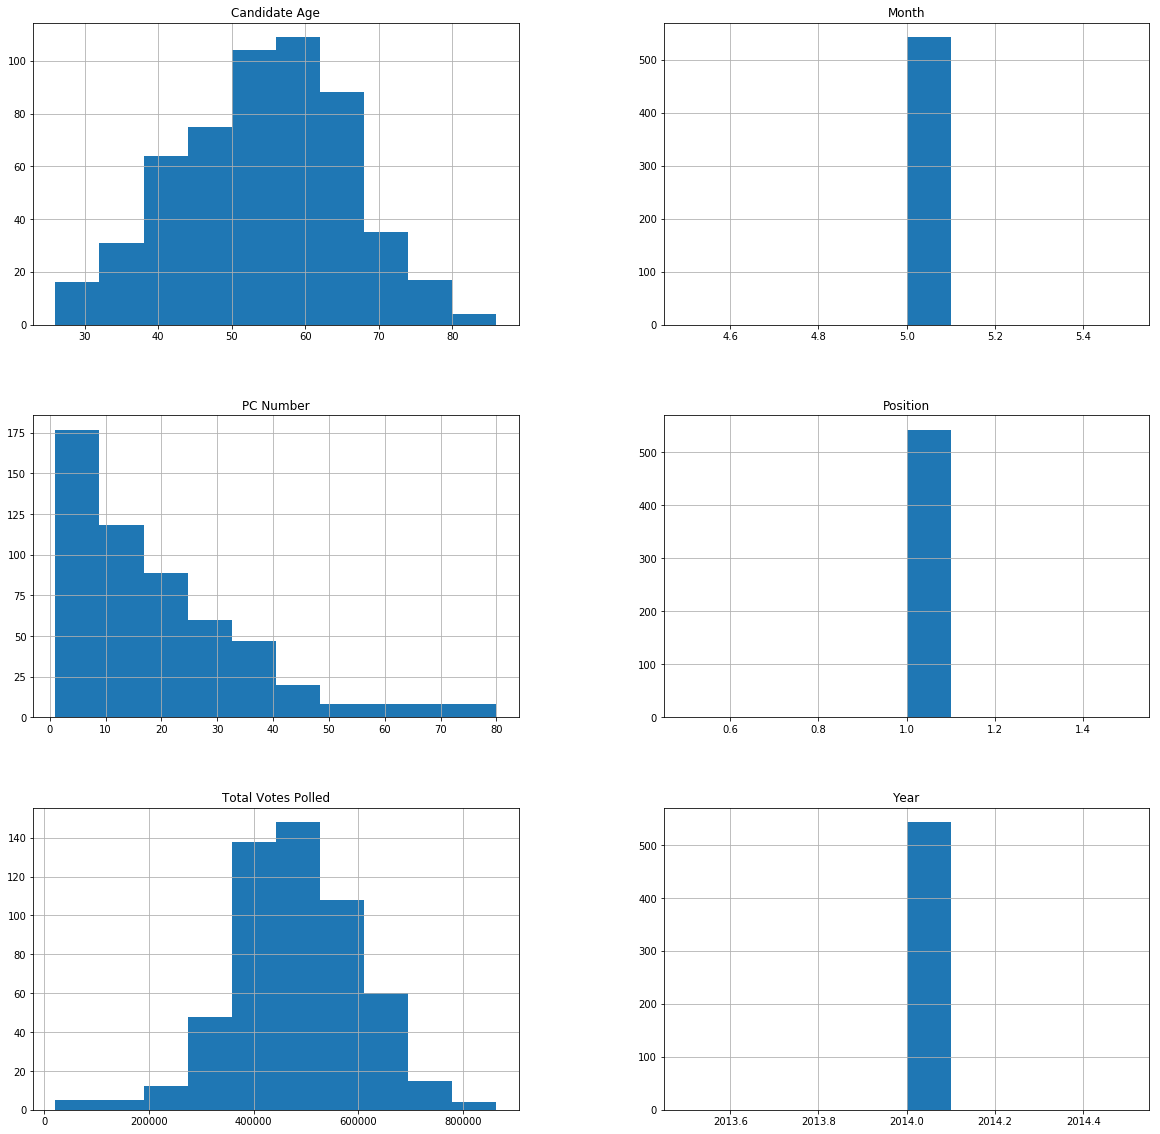

In [23]:
first_position_2014.hist()
first_position_2014.info()
print(type(first_position_2014))

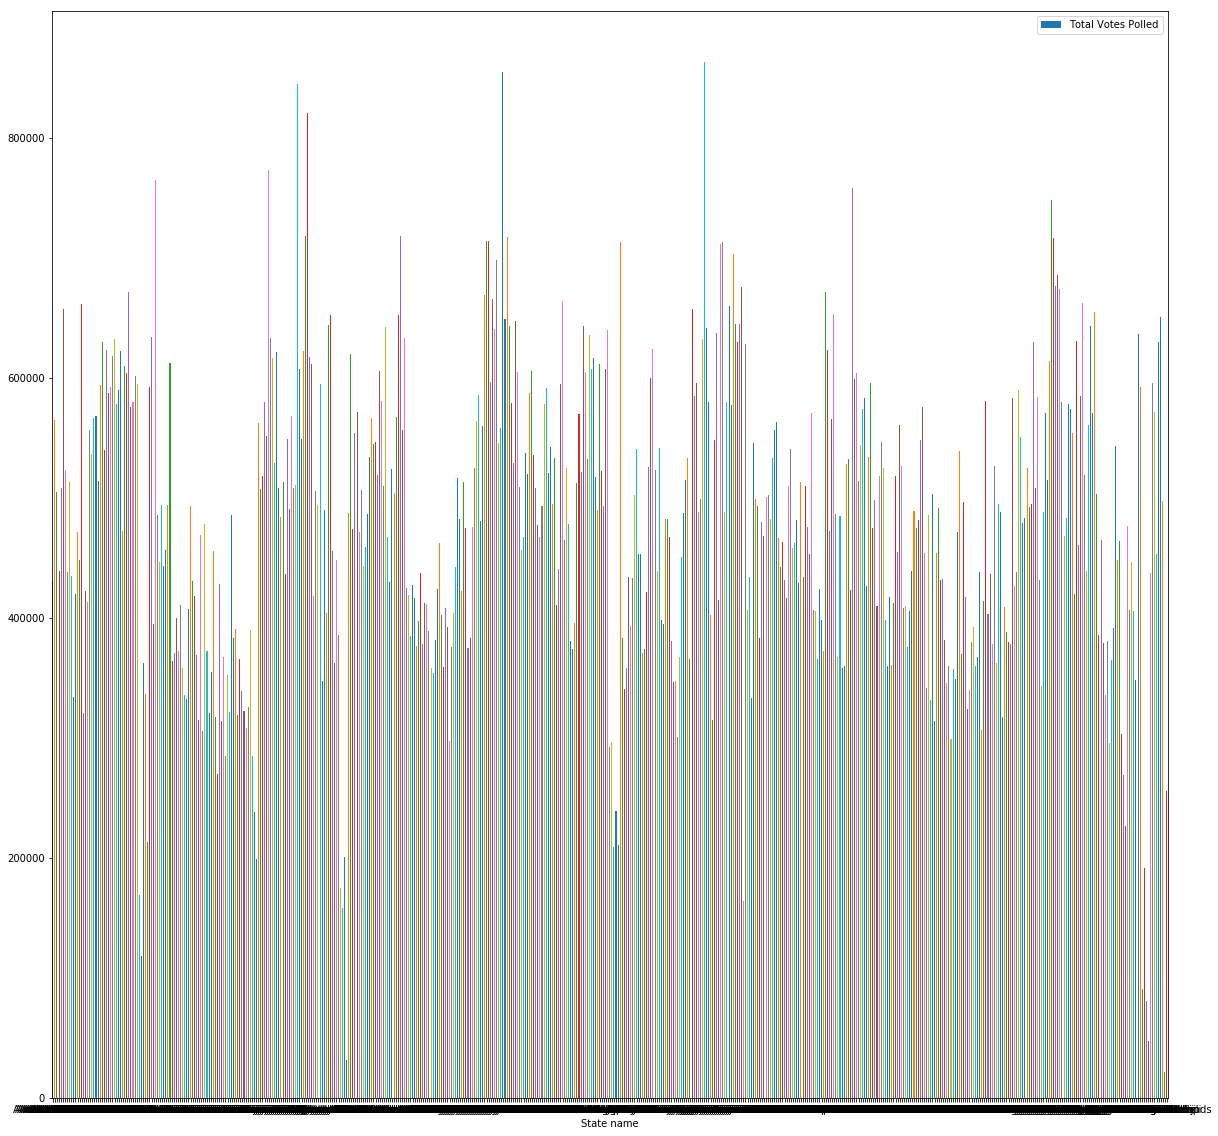

In [46]:
first_position_2014.plot.bar(x = 'State name',
                            y = 'Total Votes Polled',
                            legend = 'Party Abbreviation', rot = 0)

In [71]:
first_position_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 8763
Data columns (total 14 columns):
ST_CODE               543 non-null object
State name            543 non-null object
Month                 543 non-null int64
Year                  543 non-null int64
PC Number             543 non-null int64
PC name               543 non-null object
PC Type               543 non-null object
Candidate Name        543 non-null object
Candidate Sex         543 non-null object
Candidate Category    543 non-null object
Candidate Age         543 non-null float64
Party Abbreviation    543 non-null object
Total Votes Polled    543 non-null int64
Position              543 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 83.6+ KB


In [82]:
first_position_2014_by_state = first_position_2014.groupby(['State name', 'Party Abbreviation'])['Total Votes Polled'].sum().sort_values(ascending = False)

In [86]:
first_position_2014_by_state = first_position_2014_by_state.to_frame()

In [89]:
first_position_2014_by_state.sort_values('State name')

Total Votes Polled
State name                Party Abbreviation                    
Andaman & Nicobar Islands BJP                              90969
Andhra Pradesh            INC                             892168
                          BJP                            1545409
                          AIMIM                           513868
                          TDP                            9366606
                          YSRCP                          4951186
                          TRS                            5306838
Arunachal Pradesh         INC                             118455
                          BJP                             169367
Assam                     IND                             634428
                          AIUDF                          1350137
                          BJP                            3755326
                          INC                             992918
Bihar                     BJP                            8228622
                          JD(U)                           740808
                          BLSP                           1072804
                          RJD                            1429688
                          LJP                            1983574
                          INC                             826388
                          NCP                             431292
Chandigarh                BJP                             191362
Chattisgarh               BJP                            5420065
                          INC                             570687
Dadra & Nagar Haveli      BJP                              80790
Daman & Diu               BJP                              46960
Goa                       BJP                             436679
Gujarat                   BJP                           15249243
Haryana                   INC                             490063
                          INLD                           1000848
                          BJP                            3674091
...                                                          ...
Maharashtra               BJP                           12897341
                          INC                             960472
Manipur                   INC                             588872
Meghalaya                 NPEP                            239301
                          INC                             209340
Mizoram                   INC                             210485
NCT OF Delhi              BJP                            3838850
Nagaland                  NPF                             713372
Odisha                    BJP                             340508
                          BJD                            9168267
Puducherry                AINRC                           255826
Punjab                    BJP                             828898
                          SAD                            1817385
                          AAAP                           1716952
                          INC                            1163814
Rajasthan                 BJP                           14895106
Sikkim                    SDF                             163698
Tamil Nadu                BJP                             372906
                          ADMK                          17411635
                          PMK                             468194
Tripura                   CPM                            1295436
Uttar Pradesh             SP                             2458349
                          BJP                           32114219
                          AD                              812325
                          INC                             935085
Uttarakhand               BJP                            2429698
West Bengal               INC                            1730650
                          CPM                             744462
                          AITC                          18369634
                

In [110]:
winning_party_per_state = candidate_2014_db.groupby(['State name','Party Abbreviation','Total Votes Polled'])['Total Votes Polled'].max().to_frame()

In [96]:
winning_party_per_state.sort_values('State name') 

,Total Votes Polled
State name,
Andaman & Nicobar Islands,188764
Andhra Pradesh,48026634
Arunachal Pradesh,590635
Assam,14938826
Bihar,35304368
Chandigarh,450349
Chattisgarh,12030690
Dadra & Nagar Haveli,162324
Daman & Diu,85917


In [111]:
winning_party_per_state

Total Votes Polled
State name                Party Abbreviation Total Votes Polled                    
Andaman & Nicobar Islands AAAP               3737                              3737
                          AIFB               225                                225
                          AITC               2283                              2283
                          BJP                90969                            90969
                          BSP                1139                              1139
                          CPI(ML)(L)         436                                436
                          CPM                1777                              1777
                          INC                83157                            83157
                          IND                314                                314
                                             334                                334
                                             429                                429
                                             847                                847
                                             1587                              1587
                          NCP                1151                              1151
                          SP                 379                                379
Andhra Pradesh            AAAP               2308                              2308
                                             2344                              2344
                                             2356                              2356
                                             2499                              2499
                                             2505                              2505
                                             2559                              2559
                                             2621                              2621
                                             3088                              3088
                                             3285                              3285
                                             3401                              3401
                                             3948                              3948
                                             4393                              4393
                                             5569                              5569
                                             6118                              6118
                                             6175                              6175
...                                                                             ...
West Bengal               SUCI               7335                              7335
                                             7574                              7574
                                             7682                              7682
                                             7926                              7926
                                             7952                              7952
                                             7981                              7981
                                             8080                              8080
                                             8378                              8378
                                             8592                              8592
                                             8988                              8988
                                             9125                              9125
                                             9283                              9283
                                             9800                              9800
                                             10197                            10197
                                             10203                            10203
                                 